In [2]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
bike = pd.read_csv('day.csv')

In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#check null value
bike.isnull().any().any()

False

In [6]:
bike['dteday'] = pd.to_datetime(bike['dteday'])

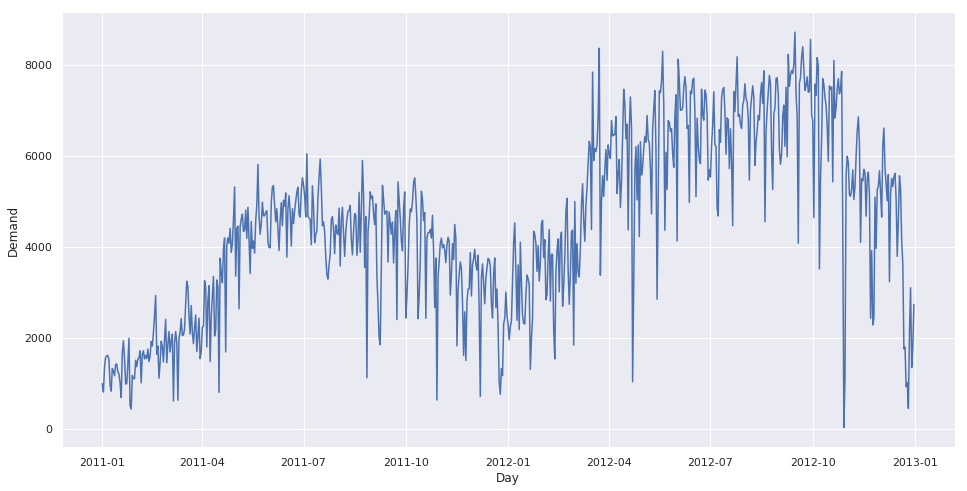

In [6]:
#plot the demand of each day
plt.figure(figsize=(16,8))
sns.set()
ax = sns.lineplot(x="dteday", y="cnt",data=bike)
ax.set(xlabel = 'Day', ylabel = 'Demand')
plt.savefig('Day Demand.png')

In [8]:
# Generating training and testing datasets
X = bike.iloc[:, 2:13]
y = bike.iloc[:, 15]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

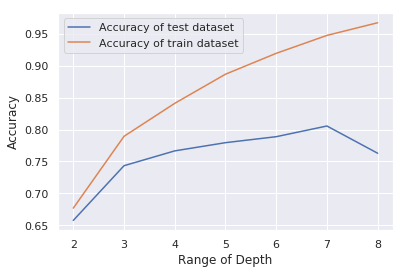

In [8]:
# Decision Tree Predict
depth_range = [2,3,4,5,6,7,8]
train_score = []
test_score = []
for item in depth_range:
    model = DecisionTreeRegressor(random_state=0,max_depth=item)
    model.fit(X_train,y_train)
    train_score_new = model.score(X_train, y_train)
    test_score_new = model.score(X_test, y_test)
    train_score.append(train_score_new)
    test_score.append(test_score_new)
plt.plot(depth_range, test_score,label='Accuracy of test dataset')
plt.plot(depth_range, train_score,label='Accuracy of train dataset')
plt.xlabel('Range of Depth')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.savefig('Range of Depth.png',dpi=300)
plt.show()

In [9]:
model = DecisionTreeRegressor(max_depth=7,random_state=0)
model.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.806


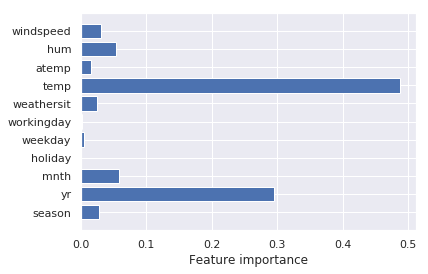

In [10]:
# Plot feature importance
def plot_feature_importance(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylim(-1, n_features)
    plt.savefig('Feature Importance',dpi=300)

plot_feature_importance(model)

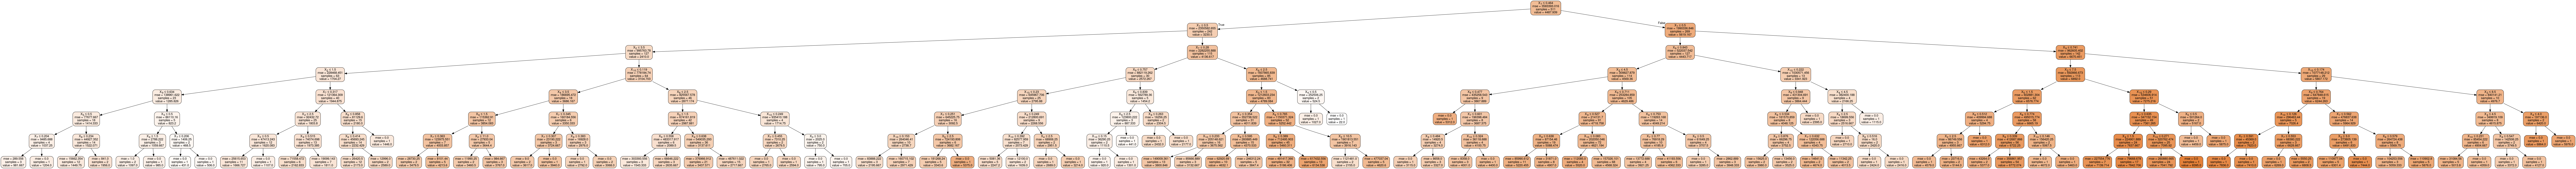

In [11]:
# Visualization of the tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

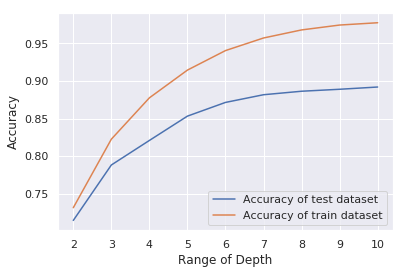

In [12]:
# Random Forests
depth_range = [2,3,4,5,6,7,8,9,10]
train_score = []
test_score = []
for item in depth_range:
    model = RandomForestRegressor(random_state=0,n_estimators=100,max_depth=item)
    model.fit(X_train,y_train)
    train_score_new = model.score(X_train, y_train)
    test_score_new = model.score(X_test, y_test)
    train_score.append(train_score_new)
    test_score.append(test_score_new)
plt.plot(depth_range, test_score,label='Accuracy of test dataset')
plt.plot(depth_range, train_score,label='Accuracy of train dataset')
plt.xlabel('Range of Depth')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.savefig('Range of Depth RF.png',dpi=300)
plt.show()

In [10]:
# Random Forests Accuracy
RF_model = RandomForestRegressor(max_depth=7,n_estimators=100,random_state=0)
RF_model.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(RF_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(RF_model.score(X_test, y_test)))

Accuracy on training set: 0.957
Accuracy on test set: 0.882


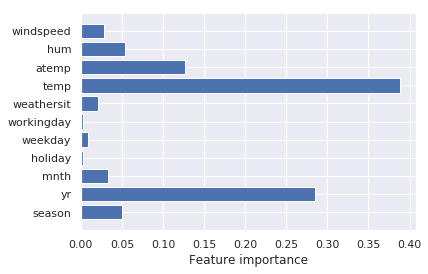

In [17]:
# Random Forests Feature Importance
plot_feature_importance(RF_model)

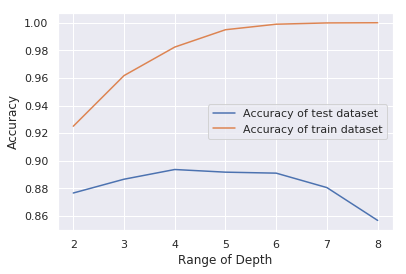

In [35]:
# Gradient Boosted
depth_range = [2,3,4,5,6,7,8]
train_score = []
test_score = []
for item in depth_range:
    model = GradientBoostingRegressor(random_state=0,max_depth=item)
    model.fit(X_train,y_train)
    train_score_new = model.score(X_train, y_train)
    test_score_new = model.score(X_test, y_test)
    train_score.append(train_score_new)
    test_score.append(test_score_new)
plt.plot(depth_range, test_score,label='Accuracy of test dataset')
plt.plot(depth_range, train_score,label='Accuracy of train dataset')
plt.xlabel('Range of Depth')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.savefig('Range of Depth GBR.png',dpi=300)
plt.show()

In [11]:
# Gradient Boosted Accuracy
GBR_model = GradientBoostingRegressor(max_depth=4,random_state=0)
GBR_model.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(GBR_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(GBR_model.score(X_test, y_test)))

Accuracy on training set: 0.982
Accuracy on test set: 0.894


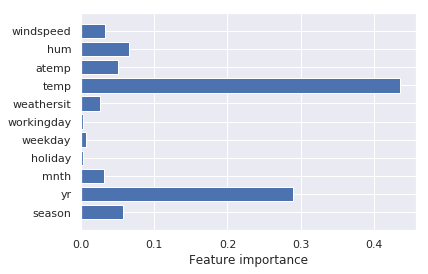

In [14]:
# Gradient Boosted Feature Importance
plot_feature_importance(GBR_model)

C:\Users\pe601428\AppData\Local\conda\conda\envs\pei\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


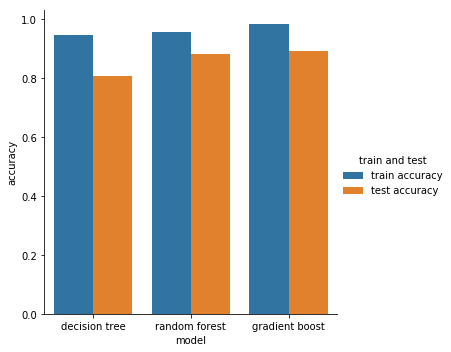

In [12]:
# Compare the accuracy of these three approaches
df = pd.DataFrame({'model':['decision tree','random forest','gradient boost'],
                   'train accuracy':[model.score(X_train, y_train),RF_model.score(X_train,y_train),GBR_model.score(X_train,y_train)],
                   'test accuracy':[model.score(X_test, y_test),RF_model.score(X_test,y_test),GBR_model.score(X_test,y_test)]})

df = pd.melt(df, id_vars="model", var_name="train and test", value_name="accuracy")
sns.factorplot(x='model', y='accuracy', hue='train and test', data=df, kind='bar')
plt.savefig('model compare',dpi=300)